In [1]:
# Numpy and Pandas 
import numpy as np
import pandas as pd

# Vizualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# Machine learning algorithms
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
# Machine learning pipeline 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Regression Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Ignore ConvergenceWarning messages
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# Check the fitted_model
from sklearn.exceptions import NotFittedError

# Save python object to disk
import pickle

from keras import backend as K

from sklearn import preprocessing

import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from sklearn.metrics import confusion_matrix , classification_report
import tensorflow.python.keras
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.models import model_from_json
from tensorflow.python.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras import backend as K
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [2]:
df = pd.read_csv('D:\\Ram\\MTech\\Final_Year_Paper_Work\\Battery_Management_System\\drive-download-20210806T114007Z-001\\Dataset\\Dataset_ANN\\US06 Highway Driving Schedule\\SP2_0C_US06\\Dataset_1.csv')

In [3]:
df

,Data_Point,Test_Time(s),Date_Time,Step_Time(s),Step_Index,Cycle_Index,Current(A),Voltage(V),SoC,Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),dV/dt(V/s),Internal_Resistance(Ohm),Is_FC_Data,AC_Impedance(Ohm),ACI_Phase_Angle(Deg)
0,1,60.014861,26/02/2016 09:14:58,60.014862,1,1,0.000000,3.446318,0.525732,0.000000,0.000000,0.000000,0.000000,-0.000032,0,0,0,0
1,2,70.030711,26/02/2016 09:15:08,10.015606,2,1,0.999713,3.627587,0.626437,0.002781,0.000000,0.010067,0.000000,0.000940,0,0,0,0
2,3,80.046108,26/02/2016 09:15:18,20.031002,2,1,0.999533,3.634876,0.630487,0.005563,0.000000,0.020168,0.000000,0.000616,0,0,0,0
3,4,90.061672,26/02/2016 09:15:28,30.046566,2,1,0.999713,3.639574,0.633097,0.008344,0.000000,0.030284,0.000000,0.000324,0,0,0,0
4,5,100.077067,26/02/2016 09:15:38,40.061961,2,1,0.999713,3.643138,0.635077,0.011125,0.000000,0.040412,0.000000,0.000292,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11440,11441,29162.278180,26/02/2016 17:20:05,574.383064,7,1,-3.692054,2.650615,0.083675,2.059422,2.000146,7.991865,7.084445,-0.128719,0,0,0,0
11441,11442,29163.293660,26/02/2016 17:20:06,575.398544,7,1,-1.655410,2.787336,0.159631,2.059422,2.000980,7.991865,7.086651,-0.074937,0,0,0,0
11442,11443,29164.309340,26/02/2016 17:20:07,576.414224,7,1,-1.910755,2.758664,0.143702,2.059422,2.001473,7.991865,7.088023,-0.054850,0,0,0,0
11443,11444,29165.309470,26/02/2016 17:20:08,577.414355,7,1,-3.444446,2.544673,0.024818,2.059422,2.002160,7.991865,7.089851,-0.084236,0,0,0,0


In [4]:
df=df.dropna()

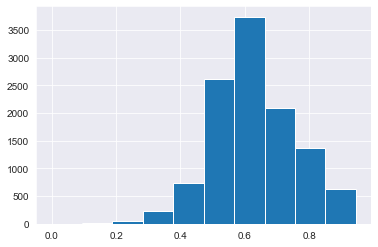

In [5]:
df.SoC.hist()
plt.show()

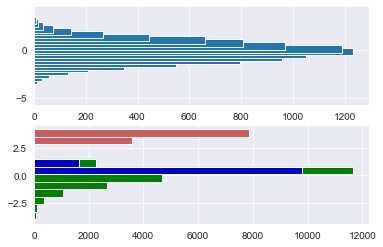

In [6]:
df1=df["Voltage(V)"]
df2=df["SoC"]
df3=df["Current(A)"]
colors = ['indianred', 'mediumblue','green']
names = ['Voltage','SoC','Current']

plt.hist([df1, df2,df3], bins = int(180/15), stacked=True,
         color = colors,label=names,orientation='horizontal')
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Voltage (V), Current (A), SoC(%)')
plt.title('Voltage, Current, SoC')
sample=np.random.normal(size=10000)
vert_hist=np.histogram(sample,bins=30)
ax1=plt.subplot(2,1,1)
ax1.barh(vert_hist[1][:-1],vert_hist[0])

ax2=plt.subplot(2,1,2)
ax2.hist([df1, df2,df3], bins = int(180/15), stacked=True,
         color = colors,label=names,orientation='horizontal')
plt.show()

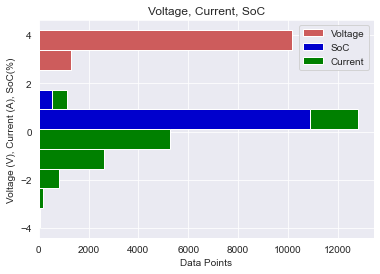

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Voltage, Current, SoC')

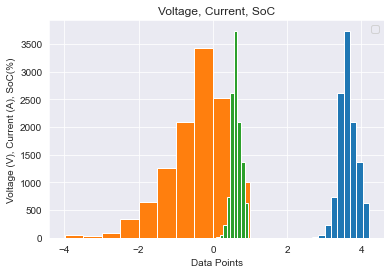

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig=plt.hist([df1, df2,df3], stacked=True,
         color = colors,label=names,orientation='horizontal')
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Voltage (V), Current (A), SoC(%)')
plt.title('Voltage, Current, SoC',loc='center')


# ax.hist([df1, df2,df3], bins, orientation='horizontal')
plt.show()
plt.savefig('Data.jpeg', dpi=600)

plt.hist(df1)
plt.hist(df3)
plt.hist(df2)
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Voltage (V), Current (A), SoC(%)')
plt.title('Voltage, Current, SoC',loc='center')

In [8]:
y = df.SoC
X = df.drop(['Test_Time(s)', 'Data_Point','Date_Time','Step_Time(s)','SoC'], axis='columns')
print(X)

       Step_Index  Cycle_Index  Current(A)  Voltage(V)  Charge_Capacity(Ah)  \
0               1            1    0.000000    3.446318             0.000000   
1               2            1    0.999713    3.627587             0.002781   
2               2            1    0.999533    3.634876             0.005563   
3               2            1    0.999713    3.639574             0.008344   
4               2            1    0.999713    3.643138             0.011125   
...           ...          ...         ...         ...                  ...   
11440           7            1   -3.692054    2.650615             2.059422   
11441           7            1   -1.655410    2.787336             2.059422   
11442           7            1   -1.910755    2.758664             2.059422   
11443           7            1   -3.444446    2.544673             2.059422   
11444           7            1   -3.444446    2.499477             2.059422   

       Discharge_Capacity(Ah)  Charge_Energy(Wh)  D

In [9]:
print(y)

0        0.525732
1        0.626437
2        0.630487
3        0.633097
4        0.635077
           ...   
11440    0.083675
11441    0.159631
11442    0.143702
11443    0.024818
11444   -0.000290
Name: SoC, Length: 11445, dtype: float64


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)

X_train = np.expand_dims(np.array(X_train),1)
y_train = np.expand_dims(np.array(y_train),1)
X_test = np.expand_dims(np.array(X_test),1)
y_test = np.expand_dims(np.array(y_test),1)

#pipelines = {
#    'mlp'   : make_pipeline(StandardScaler(), MLPRegressor(random_state=1234))
#}
print(X_train)

[[[ 6.          1.          0.         ...  0.          0.
    0.        ]]

 [[ 7.          1.         -1.19744372 ...  0.          0.
    0.        ]]

 [[ 7.          1.         -0.80929732 ...  0.          0.
    0.        ]]

 ...

 [[ 6.          1.          0.         ...  0.          0.
    0.        ]]

 [[ 7.          1.          0.20524572 ...  0.          0.
    0.        ]]

 [[ 7.          1.          0.49658042 ...  0.          0.
    0.        ]]]


In [11]:
print(X_train.dtype)
print(y_train.dtype)
print(X_test.dtype)
print(y_test.dtype)

float64
float64
float64
float64


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
dataset = df.SoC.values #numpy.ndarray
dataset = dataset.astype('float64')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [12]:
X_train.shape

(9156, 1, 13)

In [13]:
y_train.shape

(9156, 1)

In [14]:
## Import Necessary Modules
import tensorflow as tf
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects
from tensorflow import keras
class Mish(Activation):
    '''
    Mish Activation Function.
    .. math::
        mish(x) = x * tanh(softplus(x)) = x * tanh(ln(1 + e^{x}))
    Shape:
        - Input: Arbitrary. Use the keyword argument `input_shape`
        (tuple of integers, does not include the samples axis)
        when using this layer as the first layer in a model.
        - Output: Same shape as the input.
    Examples:
        >>> X = Activation('Mish', name="conv1_act")(X_input)
    '''

    def __init__(self, activation, **kwargs):
        super(Mish, self).__init__(activation, **kwargs)
        self.__name__ = 'Mish'


def mish(inputs):
    return inputs * tf.math.tanh(tf.math.softplus(inputs))

get_custom_objects().update({'Mish': Mish(mish)})

In [15]:
model = Sequential()

model.add(tf.keras.layers.Conv1D(16, 7, padding='same' , name = 'conv1'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("Mish"))

model.add(tf.keras.layers.Conv1D(32, 5, padding='same', name = 'conv2'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("Mish"))

model.add(tf.keras.layers.Conv1D(16, 5, padding='same' , name = 'conv3'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("Mish"))

model.add(tf.keras.layers.Conv1D(1, 1, name = 'conv4'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("Mish"))

model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Activation("relu"))
#model.add(tf.keras.layers.Dense(1))

model.build(input_shape=(None,None,13))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, None, 16)          1472      
_________________________________________________________________
batch_normalization (BatchNo (None, None, 16)          64        
_________________________________________________________________
activation (Activation)      (None, None, 16)          0         
_________________________________________________________________
conv2 (Conv1D)               (None, None, 32)          2592      
_________________________________________________________________
batch_normalization_1 (Batch (None, None, 32)          128       
_________________________________________________________________
activation_1 (Activation)    (None, None, 32)          0         
_________________________________________________________________
conv3 (Conv1D)               (None, None, 16)          2

In [18]:
!pip install tensorflow-addons

In [60]:
model(np.expand_dims(X_train[25],0))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.02596144]], dtype=float32)>

In [61]:
y_train[25]

array([0.66027522])

In [ ]:
import time
import psutil

start = time.time()

In [28]:
import tensorflow_addons as tfa
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data = (X_test,y_test))

Epoch 1/100
144/144 [==============================] - 2s 4ms/step - loss: 0.3105 - mean_absolute_error: 0.3105 - root_mean_squared_error: 0.3937 - val_loss: 0.0965 - val_mean_absolute_error: 0.0965 - val_root_mean_squared_error: 0.1281
Epoch 2/100
144/144 [==============================] - 0s 3ms/step - loss: 0.2181 - mean_absolute_error: 0.2181 - root_mean_squared_error: 0.3116 - val_loss: 0.1119 - val_mean_absolute_error: 0.1119 - val_root_mean_squared_error: 0.1688
Epoch 3/100
144/144 [==============================] - 0s 3ms/step - loss: 0.1661 - mean_absolute_error: 0.1661 - root_mean_squared_error: 0.2663 - val_loss: 0.1094 - val_mean_absolute_error: 0.1094 - val_root_mean_squared_error: 0.1785
Epoch 4/100
144/144 [==============================] - 0s 3ms/step - loss: 0.1362 - mean_absolute_error: 0.1362 - root_mean_squared_error: 0.2393 - val_loss: 0.0900 - val_mean_absolute_error: 0.0900 - val_root_mean_squared_error: 0.1717
Epoch 5/100
144/144 [==============================]

144/144 [==============================] - 0s 3ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - root_mean_squared_error: 0.0950 - val_loss: 0.0260 - val_mean_absolute_error: 0.0260 - val_root_mean_squared_error: 0.0854
Epoch 70/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - root_mean_squared_error: 0.0936 - val_loss: 0.0341 - val_mean_absolute_error: 0.0341 - val_root_mean_squared_error: 0.0882
Epoch 71/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - root_mean_squared_error: 0.0927 - val_loss: 0.0174 - val_mean_absolute_error: 0.0174 - val_root_mean_squared_error: 0.0821
Epoch 72/100
144/144 [==============================] - 0s 3ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - root_mean_squared_error: 0.0951 - val_loss: 0.0396 - val_mean_absolute_error: 0.0396 - val_root_mean_squared_error: 0.0896
Epoch 73/100
144/144 [==============================] - 0s 3m

In [ ]:
end = time.time()
print("Time taken:", end- start)

In [ ]:
print(psutil.Process().memory_info().peak_wset)

In [24]:
model(np.expand_dims(X_train[0],0))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.62308294]], dtype=float32)>

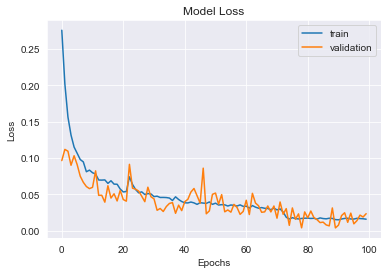

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

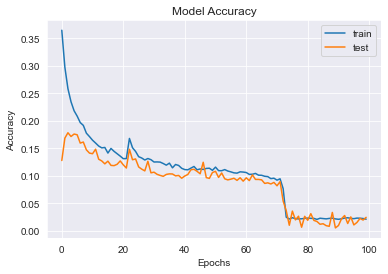

In [30]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [32]:
model.evaluate(X_test,y_test)

72/72 [==============================] - 0s 2ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - root_mean_squared_error: 0.0248


[0.023526601493358612, 0.023526601493358612, 0.02479725331068039]

In [31]:
y_train[0]

array([0.81452727])